In [57]:
# Install Pyspark
!pip install pyspark

In [58]:
# Import LIbrary
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## RDD (SparkContext)

In [59]:
# Titik utama masuk Spark untuk RDD
from pyspark import SparkContext, SparkConf

conf = SparkConf().setAppName('assignment_day6').setMaster('local[*]')
sc = SparkContext.getOrCreate(conf=conf)
sc

<SparkContext master=local[*] appName=assignment_day6>

In [60]:
# Melihat semua konfigurasi pada spark

sc.getConf().getAll()

[('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.app.name', 'assignment_day6'),
 ('spark.app.startTime', '1726181754080'),
 ('spark.driver.host

In [61]:
# Create dataframe rdd
baris = [
[3,'leo',	2,	7000],
[1,'leminerale',	3,	5000],
[2,'frenchfries',1,	15000],
[1,'nutriboost',	2,	7000],
[1,'mizone',	1,	7500],
[3,'potabee',	4,	8900],
[4,'cheesecake',	5,	9000],
[3,'twisko',	2,	4500],
[5,'indomie',	5,	3000],
[1,'aqua',	2,	5000],
[5,'lafonte',	2,	6000],
[1,'indomilk',	4,	6200],
[5,'sarden',	1,	13000],
[2,'sosis',	3,	18000],
[4,'paroti',	4,	16000],
[3,'chitato',	3,	8000],
[2,'nugget',	2,	20000] ]

kolom = ['product_id', 'product_name', 'qty', 'price']
data = pd.DataFrame(baris, columns=kolom)
print(data)

# Create RDD
rdd = sc.parallelize(data.itertuples(index=False, name=None))

# Menampilkan jumlah partisi
print("Number of partitions:", rdd.getNumPartitions())



    product_id product_name  qty  price
0            3          leo    2   7000
1            1   leminerale    3   5000
2            2  frenchfries    1  15000
3            1   nutriboost    2   7000
4            1       mizone    1   7500
5            3      potabee    4   8900
6            4   cheesecake    5   9000
7            3       twisko    2   4500
8            5      indomie    5   3000
9            1         aqua    2   5000
10           5      lafonte    2   6000
11           1     indomilk    4   6200
12           5       sarden    1  13000
13           2        sosis    3  18000
14           4       paroti    4  16000
15           3      chitato    3   8000
16           2       nugget    2  20000
Number of partitions: 12


In [62]:
rdd

ParallelCollectionRDD[14] at readRDDFromFile at PythonRDD.scala:289

In [63]:
# Mengubah jumlah partisi agar optimasi lebih lancar
new_rdd = rdd.repartition(22)
new_rdd.getNumPartitions()

22

In [64]:
newer_rdd = new_rdd.repartition(1)
newer_rdd.getNumPartitions()

1

In [65]:
# Mendapatkan debug string
newer_rdd.toDebugString()

b'(1) MapPartitionsRDD[23] at coalesce at NativeMethodAccessorImpl.java:0 []\n |  CoalescedRDD[22] at coalesce at NativeMethodAccessorImpl.java:0 []\n |  ShuffledRDD[21] at coalesce at NativeMethodAccessorImpl.java:0 []\n +-(22) MapPartitionsRDD[20] at coalesce at NativeMethodAccessorImpl.java:0 []\n    |   MapPartitionsRDD[19] at coalesce at NativeMethodAccessorImpl.java:0 []\n    |   CoalescedRDD[18] at coalesce at NativeMethodAccessorImpl.java:0 []\n    |   ShuffledRDD[17] at coalesce at NativeMethodAccessorImpl.java:0 []\n    +-(12) MapPartitionsRDD[16] at coalesce at NativeMethodAccessorImpl.java:0 []\n       |   PythonRDD[15] at RDD at PythonRDD.scala:53 []\n       |   ParallelCollectionRDD[14] at readRDDFromFile at PythonRDD.scala:289 []'

### Aggregation, Transformation, Join

In [66]:
# Meng-kalikan qty dan price
total_price_per_product = (
    rdd.map(lambda x: (x[0], x[1], x[2] * x[3])) # product_id, product_name, qty * price
    #.reduceByKey(lambda a, b: a + b) --> akan eror, karna product_name ada banyak & tidak bisa digabungkan
)

In [67]:
# Collect untuk mengambil seluruh data dari RDD
result_total_price = total_price_per_product.collect()

print("Total price per product_name:")
result_total_price

Total price per product_name:


[(3, 'leo', 14000),
 (1, 'leminerale', 15000),
 (2, 'frenchfries', 15000),
 (1, 'nutriboost', 14000),
 (1, 'mizone', 7500),
 (3, 'potabee', 35600),
 (4, 'cheesecake', 45000),
 (3, 'twisko', 9000),
 (5, 'indomie', 15000),
 (1, 'aqua', 10000),
 (5, 'lafonte', 12000),
 (1, 'indomilk', 24800),
 (5, 'sarden', 13000),
 (2, 'sosis', 54000),
 (4, 'paroti', 64000),
 (3, 'chitato', 24000),
 (2, 'nugget', 40000)]

In [68]:
# Buat RDD untuk aggregate join

# Mengambil hanya kolom 1 dan 2 (product_id dan product_name)
rdd_result_total_price = sc.parallelize([(hasil[0], hasil[2]) for hasil in result_total_price])
print(type(rdd_result_total_price))

rdd_category = sc.parallelize ([(1,'water'),
(2,'frozenfood'),
(3,'snack'),
(4,'bread'),
(5,'instantfood')])
print(type(rdd_category))

<class 'pyspark.rdd.RDD'>
<class 'pyspark.rdd.RDD'>


In [69]:
print('Total Sales per Category Name :')

result = (rdd_result_total_price
 .join(rdd_category)
 .map(lambda x: (x[1][1], x[1][0]))
 .reduceByKey(lambda x, y: x + y)
 .collect()
)

print(result)


Total Sales per Category Name :
[('bread', 109000), ('instantfood', 40000), ('water', 71300), ('frozenfood', 109000), ('snack', 82600)]


## SQL

In [70]:
from pyspark.sql.types import StringType, IntegerType, StructField, StructType

# Register the DataFrame as a temporary table/view
schema = StructType([
    StructField("product_id", IntegerType(), True),
    StructField("product_name", StringType(), True),
    StructField("qty", IntegerType(), True),
    StructField("price", IntegerType(), True)
])

# Create value for table
baris = [
[3,'leo',	2,	7000],
[1,'leminerale',	3,	5000],
[2,'frenchfries',1,	15000],
[1,'nutriboost',	2,	7000],
[1,'mizone',	1,	7500],
[3,'potabee',	4,	8900],
[4,'cheesecake',	5,	9000],
[3,'twisko',	2,	4500],
[5,'indomie',	5,	3000],
[1,'aqua',	2,	5000],
[5,'lafonte',	2,	6000],
[1,'indomilk',	4,	6200],
[5,'sarden',	1,	13000],
[2,'sosis',	3,	18000],
[4,'paroti',	4,	16000],
[3,'chitato',	3,	8000],
[2,'nugget',	2,	20000] ]

df = spark.createDataFrame(data, schema = schema)
df.createOrReplaceTempView("sales_report")


In [71]:
# Beri label pada tiap product_name berdasarkan product_id
spark.sql(
    """
    Select *,
    case when (product_id = 1) then 'drink'
        when (product_id = 2) then 'frozen_food'
        when (product_id = 3) then 'snack'
        when (product_id = 4) then 'bread'
        else 'instant_food'
    end as product_category
    from sales_report
    """
).show()

+----------+------------+---+-----+----------------+
|product_id|product_name|qty|price|product_category|
+----------+------------+---+-----+----------------+
|         3|         leo|  2| 7000|           snack|
|         1|  leminerale|  3| 5000|           drink|
|         2| frenchfries|  1|15000|     frozen_food|
|         1|  nutriboost|  2| 7000|           drink|
|         1|      mizone|  1| 7500|           drink|
|         3|     potabee|  4| 8900|           snack|
|         4|  cheesecake|  5| 9000|           bread|
|         3|      twisko|  2| 4500|           snack|
|         5|     indomie|  5| 3000|    instant_food|
|         1|        aqua|  2| 5000|           drink|
|         5|     lafonte|  2| 6000|    instant_food|
|         1|    indomilk|  4| 6200|           drink|
|         5|      sarden|  1|13000|    instant_food|
|         2|       sosis|  3|18000|     frozen_food|
|         4|      paroti|  4|16000|           bread|
|         3|     chitato|  3| 8000|           

In [72]:
# Product_category dengan penjualan paling sedikit berdasarkan total_price
spark.sql(
    """
    with tmp as
    ( Select *,
    case when (product_id = 1) then 'drink'
        when (product_id = 2) then 'frozen_food'
        when (product_id = 3) then 'snack'
        when (product_id = 4) then 'bread'
        else 'instant_food'
    end as product_category,
    qty*price as total_price
    from sales_report )
    select product_category, sum(total_price) as total
    from tmp
    group by product_category
    order by total asc
    limit 1
   """
).show()

+----------------+-----+
|product_category|total|
+----------------+-----+
|    instant_food|40000|
+----------------+-----+



## Data Frame (SparkSession)

In [73]:
# Buat direktori kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [74]:
# download dataset dari kaggle

!kaggle datasets download -d thedevastator/unlock-profits-with-e-commerce-sales-data

Dataset URL: https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data
License(s): other




  0%|          | 0.00/6.33M [00:00<?, ?B/s]
 16%|█▌        | 1.00M/6.33M [00:00<00:04, 1.34MB/s]
 32%|███▏      | 2.00M/6.33M [00:00<00:01, 2.43MB/s]
 47%|████▋     | 3.00M/6.33M [00:01<00:01, 3.05MB/s]
 79%|███████▉  | 5.00M/6.33M [00:01<00:00, 4.83MB/s]
 95%|█████████▍| 6.00M/6.33M [00:01<00:00, 5.21MB/s]
100%|██████████| 6.33M/6.33M [00:01<00:00, 4.05MB/s]


In [75]:
import zipfile
import os

# Path ke file ZIP dan file CSV di dalam ZIP
zip_path = 'unlock-profits-with-e-commerce-sales-data.zip'
csv_filename = 'Amazon Sale Report.csv'
extract_dir = 'extracted_files'

# Ekstrak file CSV dari file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extract(csv_filename, extract_dir)


In [76]:
from pyspark.sql import SparkSession

# Membuat SparkSession
spark = SparkSession.builder.appName('assignment_day6_df').getOrCreate()

# Path ke file CSV yang diekstrak
csv_path = os.path.join(extract_dir, csv_filename)

# Membaca file CSV menggunakan PySpark
df = (spark.read
      .option('header', 'true')  # First row as Header
      .option('inferschema', 'true')  # Automatic type of data
      .csv(csv_path)  # Path ke file CSV yang diekstrak
)

# Tampilkan 5 baris pertama dari DataFrame
df.show(5)


+-----+-------------------+--------+--------------------+----------+--------------+------------------+-------+---------------+-------------+----+----------+--------------+---+--------+------+-----------+-----------+----------------+------------+--------------------+-----+------------+-----------+
|index|           Order ID|    Date|              Status|Fulfilment|Sales Channel |ship-service-level|  Style|            SKU|     Category|Size|      ASIN|Courier Status|Qty|currency|Amount|  ship-city| ship-state|ship-postal-code|ship-country|       promotion-ids|  B2B|fulfilled-by|Unnamed: 22|
+-----+-------------------+--------+--------------------+----------+--------------+------------------+-------+---------------+-------------+----+----------+--------------+---+--------+------+-----------+-----------+----------------+------------+--------------------+-----+------------+-----------+
|    0|405-8078784-5731545|04-30-22|           Cancelled|  Merchant|     Amazon.in|          Standard| SET

In [77]:
# Selecting Columns/ features
df_feature = df.select('Date', 'fulfilment', 'category', 'size',
         'qty', 'amount', 'ship-city', 'status')
df_feature.show(5)

+--------+----------+-------------+----+---+------+-----------+--------------------+
|    Date|fulfilment|     category|size|qty|amount|  ship-city|              status|
+--------+----------+-------------+----+---+------+-----------+--------------------+
|04-30-22|  Merchant|          Set|   S|  0|647.62|     MUMBAI|           Cancelled|
|04-30-22|  Merchant|        kurta| 3XL|  1| 406.0|  BENGALURU|Shipped - Deliver...|
|04-30-22|    Amazon|        kurta|  XL|  1| 329.0|NAVI MUMBAI|             Shipped|
|04-30-22|  Merchant|Western Dress|   L|  0|753.33| PUDUCHERRY|           Cancelled|
|04-30-22|    Amazon|          Top| 3XL|  1| 574.0|    CHENNAI|             Shipped|
+--------+----------+-------------+----+---+------+-----------+--------------------+
only showing top 5 rows



### Filtering, Sorting, Group by, Agregat

In [79]:
from pyspark.sql.functions import col

# Filtering, Sorting
filter_df = df_feature.where(col('status') == 'Cancelled')
filter_df.orderBy(col('Amount').desc()).show(10)

print ("Dari Filtering ini diketahui bahwa status Cancelled dapat membatalkan penerimaan max 4.235 INR/ sekali transaksi. Dengan Cancel terbanyak yaitu Category Set")

+--------+----------+-------------+----+---+-------+-----------+---------+
|    Date|fulfilment|     category|size|qty| amount|  ship-city|   status|
+--------+----------+-------------+----+---+-------+-----------+---------+
|04-16-22|  Merchant|          Set|   M|  0|4235.72|     Jaipur|Cancelled|
|05-10-22|    Amazon|          Set| XXL|  2| 2676.0|    CHENNAI|Cancelled|
|06-25-22|  Merchant|          Set| XXL|  0|2389.28|DEVARAKONDA|Cancelled|
|06-09-22|  Merchant|          Set|   S|  0|2319.64|   TIRUPATI|Cancelled|
|05-02-22|  Merchant|Western Dress|   L|  0|2259.99|      NOIDA|Cancelled|
|04-20-22|    Amazon|          Set|   M|  2| 2224.0|      HISAR|Cancelled|
|04-30-22|  Merchant|          Set|   L|  0|1902.86|     HARDOI|Cancelled|
|05-13-22|    Amazon|          Set|  XS|  2| 1708.0|     NADIAD|Cancelled|
|06-04-22|    Amazon|          Set| 3XL|  1| 1698.0|    CUTTACK|Cancelled|
|06-03-22|    Amazon|          Set|  XL|  1| 1695.0|  PRAYAGRAJ|Cancelled|
+--------+----------+----

In [80]:
# Group by, Aggregat

# Mengecualikan penjualan dengan status 'Cancelled' atau terbatalkan
cancel_filter = df_feature.filter(col('status') != 'Cancelled')

# Group by penjualan berdasar kategori
group_df = cancel_filter.groupBy('Category').agg({'amount':'sum', 'qty':'sum'})
group_df = group_df.withColumnRenamed('sum(amount)', 'total_amount').withColumnRenamed('sum(qty)', 'total_qty')
group_df.orderBy(col('total_amount').desc()).show()

print('Penjualan paling banyak Set dan Kurta dengan total_qty mencapai 43rb')

+-------------+------------+---------+
|     Category|total_amount|total_qty|
+-------------+------------+---------+
|          Set| 3.5731673E7|    43033|
|        kurta|  1.942587E7|    42792|
|Western Dress|  1.020959E7|    13418|
|          Top|   4904066.0|     9368|
| Ethnic Dress|    732744.0|     1016|
|       Blouse|    418389.0|      831|
|       Bottom|    135453.0|      384|
|        Saree|    114694.0|      147|
|      Dupatta|       915.0|        3|
+-------------+------------+---------+

Penjualan paling banyak Set dan Kurta dengan total_qty mencapai 43rb


### _______________________________ VISUALIZATION ___________________________________

In [81]:
# Selecting Columns/ features
df_feature = df.select('Date', 'fulfilment', 'category', 'size',
         'qty', 'amount', 'ship-city', 'status', 'ship-service-level')
df_feature.show(5)

+--------+----------+-------------+----+---+------+-----------+--------------------+------------------+
|    Date|fulfilment|     category|size|qty|amount|  ship-city|              status|ship-service-level|
+--------+----------+-------------+----+---+------+-----------+--------------------+------------------+
|04-30-22|  Merchant|          Set|   S|  0|647.62|     MUMBAI|           Cancelled|          Standard|
|04-30-22|  Merchant|        kurta| 3XL|  1| 406.0|  BENGALURU|Shipped - Deliver...|          Standard|
|04-30-22|    Amazon|        kurta|  XL|  1| 329.0|NAVI MUMBAI|             Shipped|         Expedited|
|04-30-22|  Merchant|Western Dress|   L|  0|753.33| PUDUCHERRY|           Cancelled|          Standard|
|04-30-22|    Amazon|          Top| 3XL|  1| 574.0|    CHENNAI|             Shipped|         Expedited|
+--------+----------+-------------+----+---+------+-----------+--------------------+------------------+
only showing top 5 rows



In [82]:
# create data frame use pandas
ds = (df_feature.toPandas())
ds.head(3)

,Date,fulfilment,category,size,qty,amount,ship-city,status,ship-service-level
0,04-30-22,Merchant,Set,S,0,647.62,MUMBAI,Cancelled,Standard
1,04-30-22,Merchant,kurta,3XL,1,406.00,BENGALURU,Shipped - Delivered to Buyer,Standard
2,04-30-22,Amazon,kurta,XL,1,329.00,NAVI MUMBAI,Shipped,Expedited


In [83]:
# Check tipe data
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                128975 non-null  object 
 1   fulfilment          128975 non-null  object 
 2   category            128975 non-null  object 
 3   size                128975 non-null  object 
 4   qty                 128975 non-null  int32  
 5   amount              121180 non-null  float64
 6   ship-city           128942 non-null  object 
 7   status              128975 non-null  object 
 8   ship-service-level  128975 non-null  object 
dtypes: float64(1), int32(1), object(7)
memory usage: 8.4+ MB


In [84]:
# Ubah tipe kolom Date menjadi datetime
ds['Date'] = pd.to_datetime(ds['Date'])

C:\Users\67622\AppData\Local\Temp\ipykernel_23072\1618117319.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ds['Date'] = pd.to_datetime(ds['Date'])


In [85]:
# Check missing value & duplicated data
print(f'Total Duplikat : {ds.duplicated().sum()}')
print(f'\nTotal Kolom kosong : \n{ds.isnull().sum()}')

Total Duplikat : 4545

Total Kolom kosong : 
Date                     0
fulfilment               0
category                 0
size                     0
qty                      0
amount                7795
ship-city               33
status                   0
ship-service-level       0
dtype: int64


In [86]:
# Drop duplicated data

ds.drop_duplicates()


,Date,fulfilment,category,size,qty,amount,ship-city,status,ship-service-level
0,2022-04-30,Merchant,Set,S,0,647.62,MUMBAI,Cancelled,Standard
1,2022-04-30,Merchant,kurta,3XL,1,406.00,BENGALURU,Shipped - Delivered to Buyer,Standard
2,2022-04-30,Amazon,kurta,XL,1,329.00,NAVI MUMBAI,Shipped,Expedited
3,2022-04-30,Merchant,Western Dress,L,0,753.33,PUDUCHERRY,Cancelled,Standard
4,2022-04-30,Amazon,Top,3XL,1,574.00,CHENNAI,Shipped,Expedited
...,...,...,...,...,...,...,...,...,...
128970,2022-05-31,Amazon,kurta,XL,1,517.00,HYDERABAD,Shipped,Expedited
128971,2022-05-31,Amazon,Set,M,1,999.00,GURUGRAM,Shipped,Expedited
128972,2022-05-31,Amazon,Western Dress,XXL,1,690.00,HYDERABAD,Shipped,Expedited
128973,2022-05-31,Amazon,Set,XS,1,1199.00,Halol,Shipped,Expedited


In [87]:
# Drop Missing value

ds.dropna()

,Date,fulfilment,category,size,qty,amount,ship-city,status,ship-service-level
0,2022-04-30,Merchant,Set,S,0,647.62,MUMBAI,Cancelled,Standard
1,2022-04-30,Merchant,kurta,3XL,1,406.00,BENGALURU,Shipped - Delivered to Buyer,Standard
2,2022-04-30,Amazon,kurta,XL,1,329.00,NAVI MUMBAI,Shipped,Expedited
3,2022-04-30,Merchant,Western Dress,L,0,753.33,PUDUCHERRY,Cancelled,Standard
4,2022-04-30,Amazon,Top,3XL,1,574.00,CHENNAI,Shipped,Expedited
...,...,...,...,...,...,...,...,...,...
128970,2022-05-31,Amazon,kurta,XL,1,517.00,HYDERABAD,Shipped,Expedited
128971,2022-05-31,Amazon,Set,M,1,999.00,GURUGRAM,Shipped,Expedited
128972,2022-05-31,Amazon,Western Dress,XXL,1,690.00,HYDERABAD,Shipped,Expedited
128973,2022-05-31,Amazon,Set,XS,1,1199.00,Halol,Shipped,Expedited


In [88]:
# Pisahkan kategori dan numeric kolom
cats = ['fulfilment','category','size', 'ship-city','status','ship-service-level']
nums = ['qty', 'amount']

In [89]:
# Describe data
ds[cats].describe()

,fulfilment,category,size,ship-city,status,ship-service-level
count,128975,128975,128975,128942,128975,128975
unique,2,9,11,8955,13,2
top,Amazon,Set,M,BENGALURU,Shipped,Expedited
freq,89698,50284,22711,11217,77804,88615


In [90]:
# Describe data
ds[nums].describe()

,qty,amount
count,128975.000000,121180.000000
mean,0.904431,648.561465
std,0.313354,281.211687
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


In [91]:
ds.head()

,Date,fulfilment,category,size,qty,amount,ship-city,status,ship-service-level
0,2022-04-30,Merchant,Set,S,0,647.62,MUMBAI,Cancelled,Standard
1,2022-04-30,Merchant,kurta,3XL,1,406.00,BENGALURU,Shipped - Delivered to Buyer,Standard
2,2022-04-30,Amazon,kurta,XL,1,329.00,NAVI MUMBAI,Shipped,Expedited
3,2022-04-30,Merchant,Western Dress,L,0,753.33,PUDUCHERRY,Cancelled,Standard
4,2022-04-30,Amazon,Top,3XL,1,574.00,CHENNAI,Shipped,Expedited


In [92]:
# Category penjualan peringkat 3 terakhir berdasarkan qty
less5_cats = (ds
            .groupby('category')
            .agg(qty=('qty','sum'))
            .reset_index()
            .sort_values('qty',ascending=True)
            .head(5)
            )
less5_cats

,category,qty
2,Dupatta,3
4,Saree,152
1,Bottom,398
0,Blouse,863
3,Ethnic Dress,1053


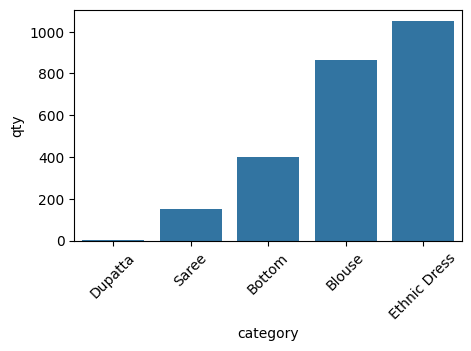

In [93]:
# visualize it
plt.figure(figsize=(5, 3))
sns.barplot(data=less5_cats, x='category', y='qty')
plt.xticks(rotation=45)
plt.xlabel
plt.show()

In [94]:
ds['status'].value_counts()

status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [95]:
cancelled_counts = ds[ds['status'] == 'Cancelled']
cancelled_counts

,Date,fulfilment,category,size,qty,amount,ship-city,status,ship-service-level
0,2022-04-30,Merchant,Set,S,0,647.62,MUMBAI,Cancelled,Standard
3,2022-04-30,Merchant,Western Dress,L,0,753.33,PUDUCHERRY,Cancelled,Standard
8,2022-04-30,Amazon,Set,3XL,0,NaN,HYDERABAD,Cancelled,Expedited
23,2022-04-30,Merchant,Set,M,0,570.48,pune,Cancelled,Standard
29,2022-04-30,Merchant,kurta,3XL,0,NaN,GUWAHATI,Cancelled,Standard
...,...,...,...,...,...,...,...,...,...
128961,2022-05-31,Amazon,Western Dress,XL,1,771.00,Junagadh,Cancelled,Expedited
128962,2022-05-31,Amazon,kurta,L,1,665.00,MUMBAI,Cancelled,Expedited
128965,2022-05-31,Amazon,Top,3XL,1,574.00,Prayagraj (ALLAHABAD),Cancelled,Expedited
128967,2022-05-31,Amazon,kurta,XS,0,NaN,Kolkata,Cancelled,Expedited


In [96]:
cancelled_counts.pivot_table(index = ['fulfilment', 'ship-service-level'], values = 'qty', 
              aggfunc = ['count'])
# paling banyak ternyata

count
                                 qty
fulfilment ship-service-level       
Amazon     Expedited           11423
           Standard               48
Merchant   Standard             6861

Pengiriman di cancel paling banyak berasal dari AMazon dengan pengriman cepat.

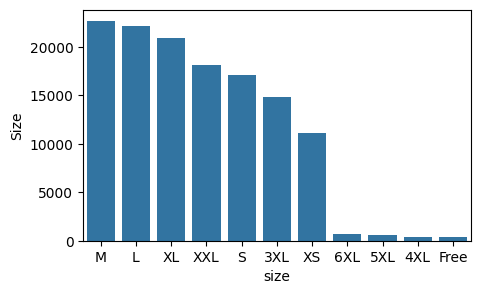

In [97]:
# Size apa yang paling banyak di minati orang?

# Filtering
a = ds[(ds['size'] == 1)]

size_repot = (ds
            .groupby('size')
           .agg(Size=('size', 'count'))
           .reset_index()
           .sort_values('Size', ascending=False))
size_repot

# visualize it
plt.figure(figsize=(5,3))
sns.barplot(data=size_repot, x='size', y='Size')
plt.show()